Libraries

In [94]:
import pandas as pd
import numpy as np
import gender_guesser.detector as gender
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

Load data

In [74]:
df=pd.read_csv("D:\DataScience\Data\StudentPrediction\student_performance_updated_1000.csv")
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())

   StudentID     Name  Gender  AttendanceRate  StudyHoursPerWeek  \
0        1.0     John    Male            85.0               15.0   
1        2.0    Sarah  Female            90.0               20.0   
2        3.0     Alex    Male            78.0               10.0   
3        4.0  Michael    Male            92.0               25.0   
4        5.0     Emma  Female             NaN               18.0   

   PreviousGrade  ExtracurricularActivities ParentalSupport  FinalGrade  \
0           78.0                        1.0            High        80.0   
1           85.0                        2.0          Medium        87.0   
2           65.0                        0.0             Low        68.0   
3           90.0                        3.0            High        92.0   
4           82.0                        2.0          Medium        85.0   

   Study Hours  Attendance (%) Online Classes Taken  
0          4.8            59.0                False  
1          2.2            70.0  

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\CM\AppData\Local\Temp\ipykernel_8212\2147595185.py:1: SyntaxWarning: invalid escape sequence '\D'
  df=pd.read_csv("D:\DataScience\Data\StudentPrediction\student_performance_updated_1000.csv")


Handle missing Values: 1- Gender

In [75]:
missing_name_gender = df[df['Name'].isna() & df['Gender'].isna()]
print("Rows with both missing:", missing_name_gender.shape[0])
df = df.drop(missing_name_gender.index)
#d = gender.Detector()
#df['Gender'] = df.apply(lambda row: d.get_gender(row['Name'])
#                        if pd.isna(row['Gender']) and pd.notna(row['Name'])
#                        else row['Gender'], axis=1)
d = gender.Detector()
df['Gender'] = df.apply(
    lambda row: d.get_gender(str(row['Name']).split()[0])  # take only the first name
    if pd.isna(row['Gender']) and pd.notna(row['Name'])
    else row['Gender'],
    axis=1
)
print(df)


Rows with both missing: 1
     StudentID            Name  Gender  AttendanceRate  StudyHoursPerWeek  \
0          1.0            John    Male            85.0               15.0   
1          2.0           Sarah  Female            90.0               20.0   
2          3.0            Alex    Male            78.0               10.0   
3          4.0         Michael    Male            92.0               25.0   
4          5.0            Emma  Female             NaN               18.0   
..         ...             ...     ...             ...                ...   
995        NaN  Kenneth Murray    Male            85.0               20.0   
996     4497.0       Amy Stout  Female            91.0                NaN   
997     1886.0             NaN    Male            85.0                8.0   
998     7636.0  Joseph Sherman    Male            88.0               17.0   
999     8021.0     Maria Walls  Female            88.0               10.0   

     PreviousGrade  ExtracurricularActivities Par

2- Drop Identifiers

In [76]:
df = df.drop(['StudentID', 'Name'], axis=1)

Handle redunduncy

In [77]:
# Step 3a: Convert StudyHoursPerWeek to per day (assuming 5-day week)
df['StudyHoursPerDay_Calc'] = df['StudyHoursPerWeek'] / 5

# Step 3b: Recalculate StudyHoursPerWeek from StudyHoursPerDay
df['StudyHoursPerWeek_Calc'] = df['Study Hours'] * 5

# Step 3c: Create average columns (blended)
df['StudyHoursPerDay_Avg'] = (df['StudyHoursPerDay_Calc'] + df['Study Hours']) / 2
df['StudyHoursPerWeek_Avg'] = (df['StudyHoursPerWeek_Calc'] + df['StudyHoursPerWeek']) / 2

# Step 3d: Drop originals and intermediate calculation columns, keep only average per week
df = df.drop(['StudyHoursPerWeek', 'Study Hours', 'StudyHoursPerDay_Calc', 'StudyHoursPerWeek_Calc', 'StudyHoursPerDay_Avg'], axis=1)


Handle negative values

In [78]:
df['StudyHoursPerWeek_Avg'] = df['StudyHoursPerWeek_Avg'].abs()

Impute missing values

In [79]:
# Numeric columns: AttendanceRate, PreviousGrade, FinalGrade, Attendance (%), StudyHoursPerWeek_Avg
numeric_cols = ['AttendanceRate', 'PreviousGrade', 'FinalGrade', 'Attendance (%)', 'StudyHoursPerWeek_Avg']
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Categorical columns: ExtracurricularActivities, ParentalSupport, Online Classes Taken, Gender
categorical_cols = ['ExtracurricularActivities', 'ParentalSupport', 'Online Classes Taken', 'Gender']
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

Check

In [80]:
print(df.isna().sum())
print(df.describe())

Gender                       0
AttendanceRate               0
PreviousGrade                0
ExtracurricularActivities    0
ParentalSupport              0
FinalGrade                   0
Attendance (%)               0
Online Classes Taken         0
StudyHoursPerWeek_Avg        0
dtype: int64
       AttendanceRate  PreviousGrade  FinalGrade  Attendance (%)  \
count      999.000000     999.000000  999.000000      999.000000   
mean        85.505735      77.599379   80.022941       77.247390   
std          7.186028       9.844887    9.303688       18.907442   
min         70.000000      60.000000   62.000000       50.000000   
25%         82.000000      70.000000   72.000000       64.000000   
50%         85.505735      78.000000   80.022941       77.000000   
75%         91.000000      86.000000   88.000000       89.000000   
max         95.000000      90.000000   92.000000      200.000000   

       StudyHoursPerWeek_Avg  
count             999.000000  
mean               14.915858  
st

In [81]:
df = df.drop(['Attendance (%)'], axis=1)

In [82]:
print(df)

     Gender  AttendanceRate  PreviousGrade ExtracurricularActivities  \
0      Male       85.000000      78.000000                       1.0   
1    Female       90.000000      85.000000                       2.0   
2      Male       78.000000      65.000000                       0.0   
3      Male       92.000000      90.000000                       3.0   
4    Female       85.505735      82.000000                       2.0   
..      ...             ...            ...                       ...   
995    Male       85.000000      77.599379                       1.0   
996  Female       91.000000      86.000000                       0.0   
997    Male       85.000000      82.000000                       2.0   
998    Male       88.000000      60.000000                       2.0   
999  Female       88.000000      90.000000                       1.0   

    ParentalSupport  FinalGrade Online Classes Taken  StudyHoursPerWeek_Avg  
0              High   80.000000                False     

In [83]:
print(df.columns)


Index(['Gender', 'AttendanceRate', 'PreviousGrade',
       'ExtracurricularActivities', 'ParentalSupport', 'FinalGrade',
       'Online Classes Taken', 'StudyHoursPerWeek_Avg'],
      dtype='object')


In [84]:
uniquegenders= df['Gender'].unique()
print(uniquegenders)
unique_counts = df['Gender'].value_counts()
print(unique_counts)

['Male' 'Female' 'mostly_female' 'female' 'male' 'mostly_male']
Gender
Male             501
Female           451
female            21
male              21
mostly_female      3
mostly_male        2
Name: count, dtype: int64


In [85]:
    #print(df['Gender'].unique)
    #print(df.nunique(['Gender']))
    #print(df.unique['Gender'])

gender_map = {
    'male': 'Male',
    'Male': 'Male',
    'Female': 'Female',
    'mostly_male': 'Male',
    'female': 'Female',
    'mostly_female': 'Female'
}

df['Gender'] = df['Gender'].map(gender_map)

uniquegenders= df['Gender'].unique()
print(uniquegenders)
unique_counts = df['Gender'].value_counts()
print(unique_counts)

['Male' 'Female']
Gender
Male      524
Female    475
Name: count, dtype: int64


In [95]:
print(df.info())
print(df.describe())
print(df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     999 non-null    object 
 1   AttendanceRate             999 non-null    float64
 2   PreviousGrade              999 non-null    float64
 3   ExtracurricularActivities  999 non-null    object 
 4   ParentalSupport            999 non-null    object 
 5   FinalGrade                 999 non-null    float64
 6   Online Classes Taken       999 non-null    object 
 7   StudyHoursPerWeek_Avg      999 non-null    float64
dtypes: float64(4), object(4)
memory usage: 70.2+ KB
None
       AttendanceRate  PreviousGrade  FinalGrade  StudyHoursPerWeek_Avg
count      999.000000     999.000000  999.000000             999.000000
mean        85.505735      77.599379   80.022941              14.915858
std          7.186028       9.844887    9.303688               4.63

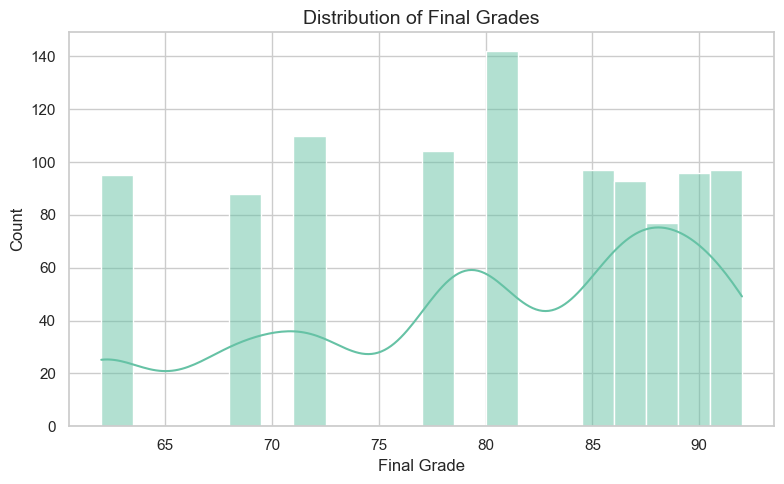

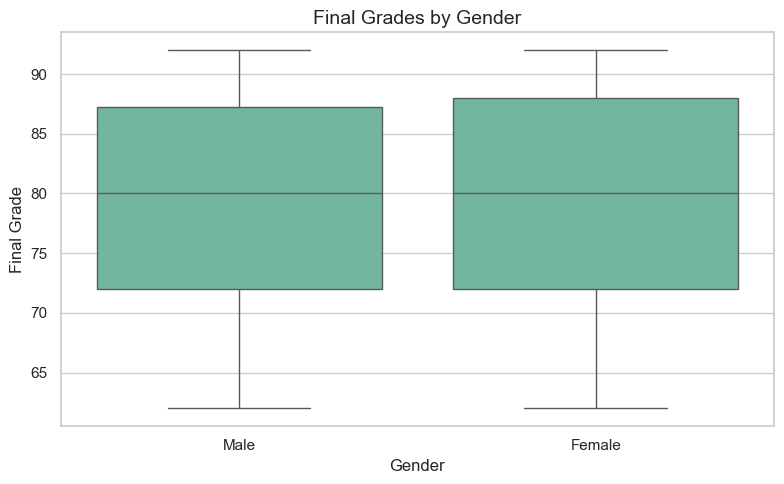

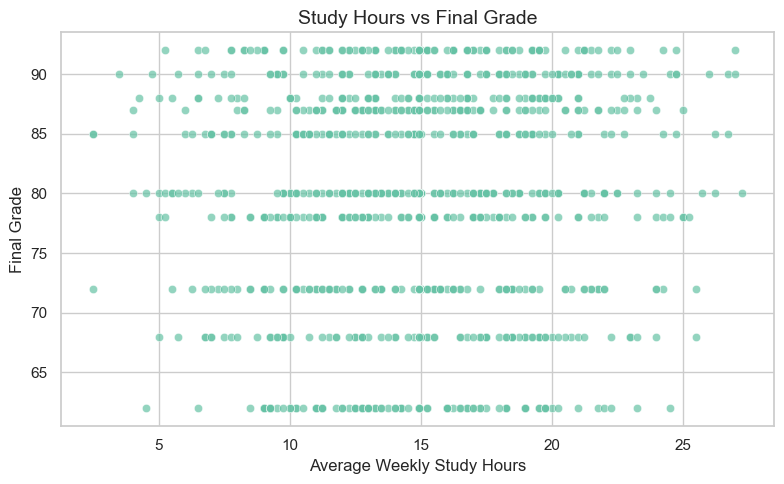

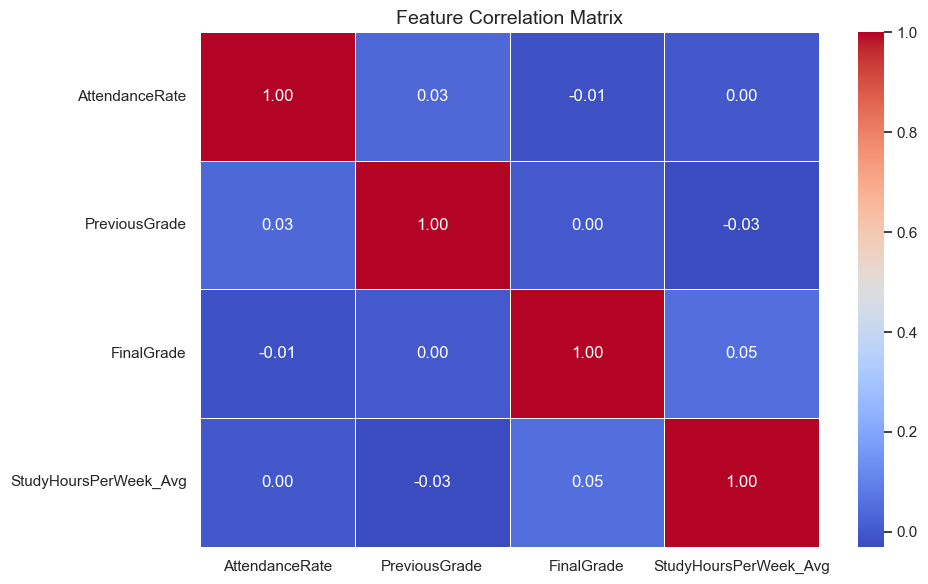

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean style and consistent figure size
sns.set(style="whitegrid", palette="Set2")
plt.rcParams["figure.figsize"] = (8, 5)

# 1️⃣ Final Grade Distribution
plt.figure()
sns.histplot(df['FinalGrade'], kde=True, bins=20)
plt.title('Distribution of Final Grades', fontsize=14)
plt.xlabel('Final Grade')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 2️⃣ Grades by Gender
plt.figure()
sns.boxplot(x='Gender', y='FinalGrade', data=df)
plt.title('Final Grades by Gender', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Final Grade')
plt.tight_layout()
plt.show()

# 3️⃣ Study Hours vs Final Grade
plt.figure()
sns.scatterplot(x='StudyHoursPerWeek_Avg', y='FinalGrade', data=df, alpha=0.7)
plt.title('Study Hours vs Final Grade', fontsize=14)
plt.xlabel('Average Weekly Study Hours')
plt.ylabel('Final Grade')
plt.tight_layout()
plt.show()

# 4️⃣ Correlation Heatmap (numeric only)
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

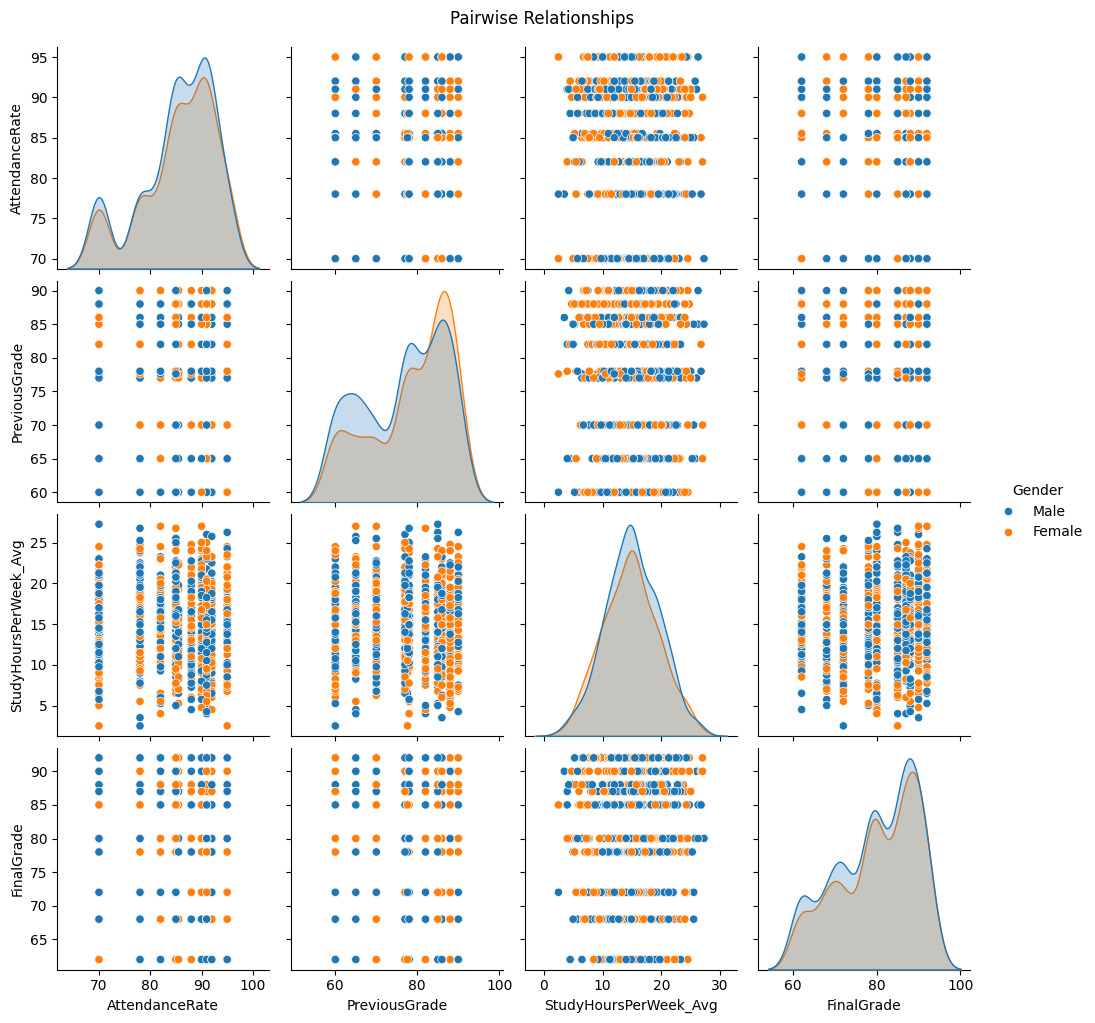

In [98]:

plt.figure(figsize=(10, 6))
sns.pairplot(df, vars=['AttendanceRate', 'PreviousGrade', 'StudyHoursPerWeek_Avg', 'FinalGrade'], hue='Gender')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()


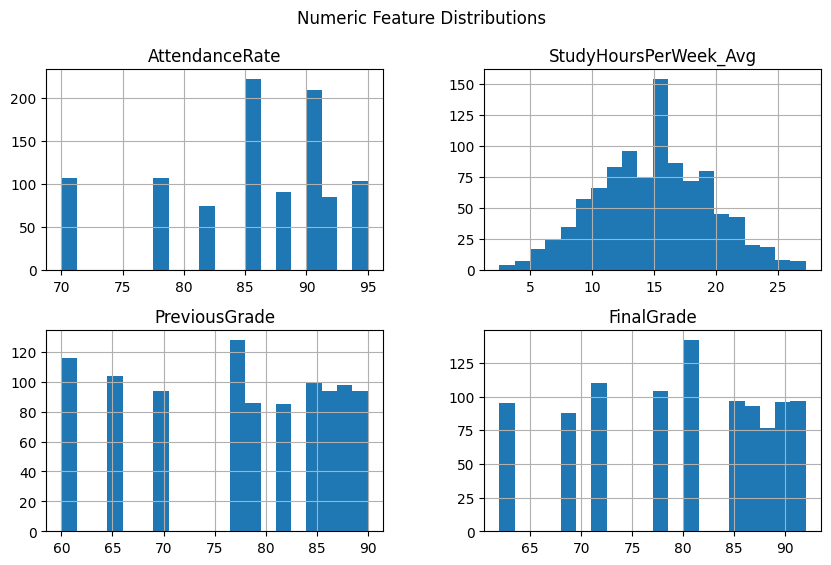

In [99]:
df[['AttendanceRate', 'StudyHoursPerWeek_Avg', 'PreviousGrade', 'FinalGrade']].hist(bins=20, figsize=(10, 6))
plt.suptitle('Numeric Feature Distributions')
plt.show()


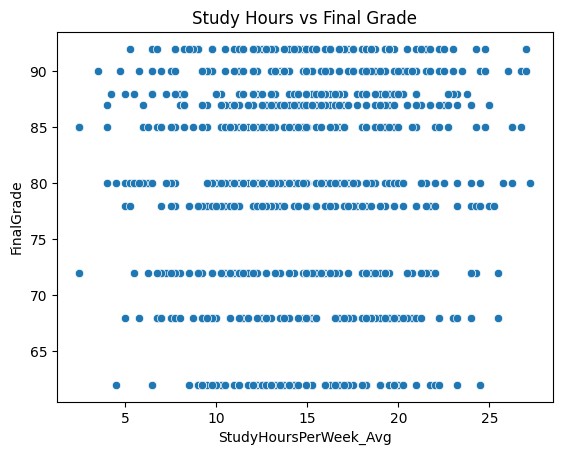

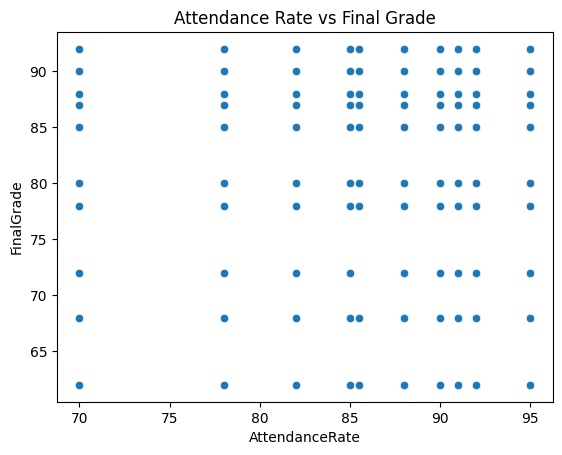

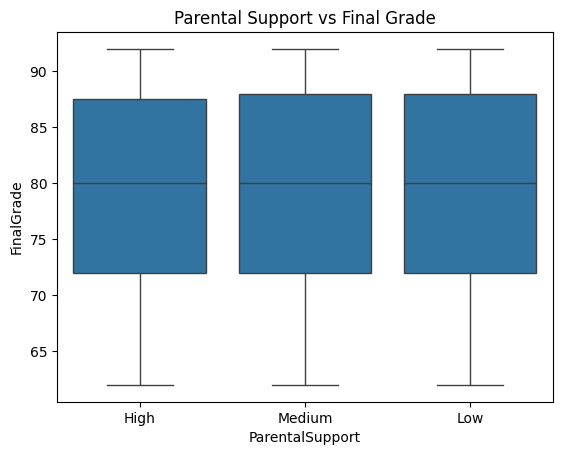

In [100]:
sns.scatterplot(x='StudyHoursPerWeek_Avg', y='FinalGrade', data=df)
plt.title('Study Hours vs Final Grade')
plt.show()

sns.scatterplot(x='AttendanceRate', y='FinalGrade', data=df)
plt.title('Attendance Rate vs Final Grade')
plt.show()

sns.boxplot(x='ParentalSupport', y='FinalGrade', data=df)
plt.title('Parental Support vs Final Grade')
plt.show()



Linear Regression Results:
MAE: 7.71, RMSE: 9.47, R²: -0.00

Random Forest Results:
MAE: 8.09, RMSE: 9.84, R²: -0.08


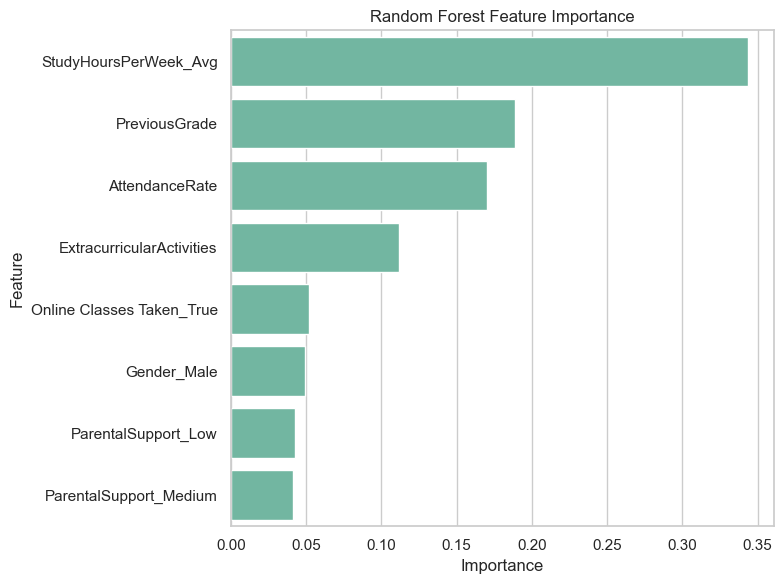

In [103]:
# ===========================
# Step: Encoding, Scaling, Modeling (Fixed)
# ===========================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assume `df` is your cleaned dataframe

# ---------------------------
# 1️⃣ Encode categorical features
# ---------------------------
categorical_cols = ['Gender', 'ParentalSupport', 'Online Classes Taken']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded = pd.DataFrame(
    encoder.fit_transform(df[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=df.index
)

df_model = pd.concat([df.drop(categorical_cols, axis=1), encoded], axis=1)

# ---------------------------
# 2️⃣ Split features and target
# ---------------------------
X = df_model.drop('FinalGrade', axis=1)
y = df_model['FinalGrade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# 3️⃣ Feature scaling
# ---------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------
# 4️⃣ Train models
# ---------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, preds)
    rmse = mean_squared_error(y_test, preds) ** 0.5  # Fixed RMSE calculation
    r2 = r2_score(y_test, preds)

    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}

    print(f"\n{name} Results:")
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

    # Feature importance for Random Forest
    if name == "Random Forest":
        importances = model.feature_importances_
        feature_names = X.columns
        importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values('Importance', ascending=False)

        plt.figure(figsize=(8,6))
        sns.barplot(x='Importance', y='Feature', data=importance_df)
        plt.title('Random Forest Feature Importance')
        plt.tight_layout()
        plt.show()
